<a href="https://colab.research.google.com/github/dinesh842/python-/blob/main/crop_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
crop_Classification_traindata=pd.read_csv("/content/crop_Classification_UnsuperviUnsupervised_traindata.csv")

In [ ]:
crop_Classification_traindata.head()

,Unnamed: 0,N,P,K,temperature,humidity,ph,rainfall
0,0,17.0,136.0,196.0,23.871923,90.499390,5.882156,103.054809
1,1,49.0,69.0,82.0,18.315615,15.361435,7.263119,81.787105
2,2,74.0,49.0,38.0,23.314104,71.450905,7.488014,164.497037
3,3,104.0,35.0,28.0,27.510061,50.666872,6.983732,143.995555
4,4,23.0,72.0,84.0,19.020613,17.131591,6.920251,79.926981


In [ ]:
crop_Classification_testdata=pd.read_csv("/content/crop_Classification_testdata.csv")

In [ ]:
crop_Classification_testdata.head()

,Unnamed: 0,N,P,K,temperature,humidity,ph,rainfall
0,0,22.00000,51.00000,16.000000,27.965837,61.349001,8.639586,70.104721
1,1,130.20691,59.20691,18.586179,25.123987,82.356124,6.707583,91.431992
2,2,28.00000,27.00000,34.000000,32.454653,50.696938,6.526654,95.048716
3,3,40.00000,61.00000,22.000000,20.949818,65.810876,7.002216,44.239130
4,4,28.00000,46.00000,16.000000,29.008124,84.960894,6.664188,45.910114


In [ ]:
crop_Classification_traindata.isnull().sum()

Unnamed: 0     0
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
dtype: int64

In [ ]:
crop_Classification_testdata.isnull().sum()

Unnamed: 0     0
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
dtype: int64

In [ ]:
crop_Classification_testdata.describe()

,Unnamed: 0,N,P,K,temperature,humidity,ph,rainfall
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,274.500000,50.728512,53.615582,47.963333,25.507455,71.386176,6.435517,102.997666
std,158.915596,36.157802,33.192159,50.778389,4.851460,22.288078,0.765326,54.152121
min,0.000000,0.000000,5.000000,5.000000,10.164313,14.697653,3.504752,20.762230
25%,137.250000,22.776532,29.000000,20.000000,22.699643,60.274971,5.955890,65.547552
50%,274.500000,37.034329,50.000000,32.000000,25.437798,80.682761,6.418598,96.215773
75%,411.750000,85.000000,68.054888,48.000000,28.469547,90.183527,6.863259,122.120548
max,549.000000,140.000000,145.000000,205.000000,43.360515,99.645730,9.392695,295.924880


In [ ]:
crop_Classification_testdata.describe()

,Unnamed: 0,N,P,K,temperature,humidity,ph,rainfall
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,274.500000,50.728512,53.615582,47.963333,25.507455,71.386176,6.435517,102.997666
std,158.915596,36.157802,33.192159,50.778389,4.851460,22.288078,0.765326,54.152121
min,0.000000,0.000000,5.000000,5.000000,10.164313,14.697653,3.504752,20.762230
25%,137.250000,22.776532,29.000000,20.000000,22.699643,60.274971,5.955890,65.547552
50%,274.500000,37.034329,50.000000,32.000000,25.437798,80.682761,6.418598,96.215773
75%,411.750000,85.000000,68.054888,48.000000,28.469547,90.183527,6.863259,122.120548
max,549.000000,140.000000,145.000000,205.000000,43.360515,99.645730,9.392695,295.924880


In [11]:
crop_Classification_traindata.shape

(1650, 8)

For train dataset K means clustering


In [12]:
from sklearn.cluster import KMeans

In [13]:
X=crop_Classification_traindata.iloc[:,[6,7]].values

In [14]:
print(X)

[[  5.88215599 103.0548094 ]
 [  7.26311855  81.78710463]
 [  7.4880144  164.4970373 ]
 ...
 [  6.40071975  69.39630398]
 [  6.33461025 166.2549307 ]
 [  6.81671231  42.42737423]]


In [24]:
wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

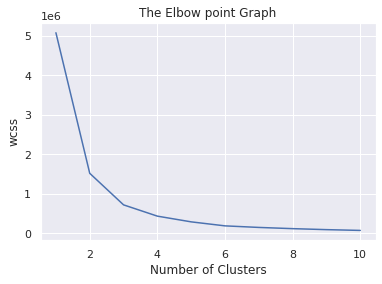

In [26]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [37]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)

Y=kmeans.fit_predict(X)

print(Y)

[0 2 2 0 0 2 0 0 0 0 1 0 2 2 2 0 0 2 0 0 1 1 0 0 2 2 1 0 2 0 2 0 2 0 0 0 2
 2 0 0 0 0 1 2 0 2 0 1 0 2 0 2 0 2 1 2 2 1 0 2 0 2 0 0 2 2 2 0 0 1 0 2 0 2
 2 2 0 2 2 1 1 0 2 2 2 0 2 2 2 2 0 2 2 0 0 0 0 2 0 2 2 0 2 1 2 0 1 0 0 2 2
 0 2 0 1 2 2 2 0 1 0 2 2 0 2 0 0 2 1 0 1 0 0 0 1 0 2 1 1 2 2 1 1 2 0 2 0 0
 2 2 2 0 0 2 0 0 2 0 2 1 0 2 2 2 2 0 0 0 0 0 2 1 2 2 1 2 0 0 1 1 2 1 1 2 2
 0 1 2 2 0 1 2 2 2 0 2 1 0 2 2 1 0 0 0 2 0 2 0 0 0 0 1 0 1 2 0 2 0 1 0 0 2
 0 2 0 2 1 1 2 0 0 2 0 0 2 0 0 0 0 0 1 0 0 2 1 2 2 2 2 2 2 2 0 0 0 0 0 1 2
 0 0 2 2 2 2 0 2 2 2 2 2 0 0 1 0 0 2 0 2 0 1 0 0 2 2 1 2 0 0 0 0 2 0 2 2 0
 2 2 0 2 0 2 0 1 2 2 2 0 2 0 1 2 2 0 0 0 0 0 1 0 0 2 0 2 0 2 2 0 2 0 1 1 0
 2 1 0 0 0 2 0 2 1 0 1 1 0 0 1 2 1 1 2 1 2 0 2 0 2 1 0 2 1 0 2 1 0 2 0 2 0
 0 0 0 0 2 2 2 0 2 1 1 2 0 2 2 2 0 0 1 1 2 2 2 2 2 2 1 2 2 2 1 0 2 2 0 1 2
 0 2 2 2 1 2 0 2 0 0 2 2 2 2 2 0 0 0 1 1 2 0 1 2 2 0 0 2 0 0 1 2 2 0 2 0 2
 0 1 1 0 0 0 1 0 1 2 1 2 0 2 2 2 1 0 1 0 0 0 0 2 2 0 2 0 2 0 0 2 2 1 0 0 2
 2 2 0 0 0 2 2 2 2 2 0 2 

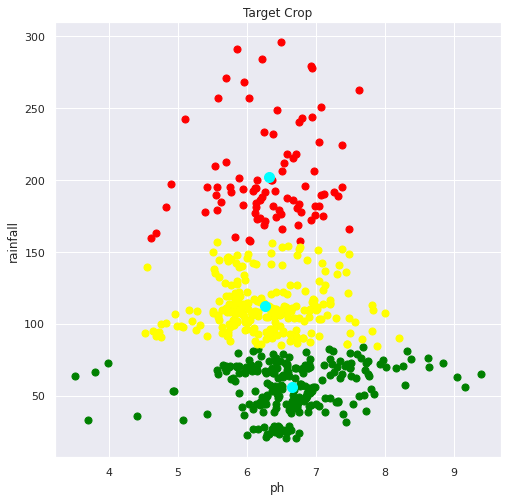

In [39]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red',label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='yellow',label='Cluster 3')




plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='Centroids')


plt.title('Target Crop')
plt.xlabel('ph')
plt.ylabel('rainfall')
plt.show()


For test dataset k means clustering



In [44]:
X=crop_Classification_testdata.iloc[:,[6,7]].values

In [45]:
print(X)

[[  8.6395862   70.10472076]
 [  6.70758258  91.43199234]
 [  6.52665434  95.04871605]
 ...
 [  5.72011616 143.30679625]
 [  6.05349932 107.95033245]
 [  7.13027866  48.56690235]]


In [46]:
wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

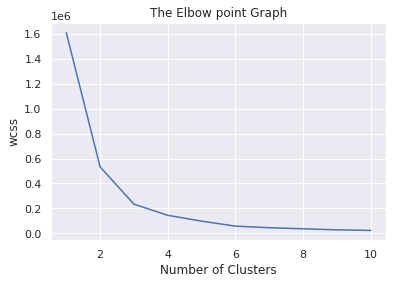

In [47]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [48]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)

Y=kmeans.fit_predict(X)

print(Y)

[0 2 2 0 0 2 0 0 0 0 1 0 2 2 2 0 0 2 0 0 1 1 0 0 2 2 1 0 2 0 2 0 2 0 0 0 2
 2 0 0 0 0 1 2 0 2 0 1 0 2 0 2 0 2 1 2 2 1 0 2 0 2 0 0 2 2 2 0 0 1 0 2 0 2
 2 2 0 2 2 1 1 0 2 2 2 0 2 2 2 2 0 2 2 0 0 0 0 2 0 2 2 0 2 1 2 0 1 0 0 2 2
 0 2 0 1 2 2 2 0 1 0 2 2 0 2 0 0 2 1 0 1 0 0 0 1 0 2 1 1 2 2 1 1 2 0 2 0 0
 2 2 2 0 0 2 0 0 2 0 2 1 0 2 2 2 2 0 0 0 0 0 2 1 2 2 1 2 0 0 1 1 2 1 1 2 2
 0 1 2 2 0 1 2 2 2 0 2 1 0 2 2 1 0 0 0 2 0 2 0 0 0 0 1 0 1 2 0 2 0 1 0 0 2
 0 2 0 2 1 1 2 0 0 2 0 0 2 0 0 0 0 0 1 0 0 2 1 2 2 2 2 2 2 2 0 0 0 0 0 1 2
 0 0 2 2 2 2 0 2 2 2 2 2 0 0 1 0 0 2 0 2 0 1 0 0 2 2 1 2 0 0 0 0 2 0 2 2 0
 2 2 0 2 0 2 0 1 2 2 2 0 2 0 1 2 2 0 0 0 0 0 1 0 0 2 0 2 0 2 2 0 2 0 1 1 0
 2 1 0 0 0 2 0 2 1 0 1 1 0 0 1 2 1 1 2 1 2 0 2 0 2 1 0 2 1 0 2 1 0 2 0 2 0
 0 0 0 0 2 2 2 0 2 1 1 2 0 2 2 2 0 0 1 1 2 2 2 2 2 2 1 2 2 2 1 0 2 2 0 1 2
 0 2 2 2 1 2 0 2 0 0 2 2 2 2 2 0 0 0 1 1 2 0 1 2 2 0 0 2 0 0 1 2 2 0 2 0 2
 0 1 1 0 0 0 1 0 1 2 1 2 0 2 2 2 1 0 1 0 0 0 0 2 2 0 2 0 2 0 0 2 2 1 0 0 2
 2 2 0 0 0 2 2 2 2 2 0 2 

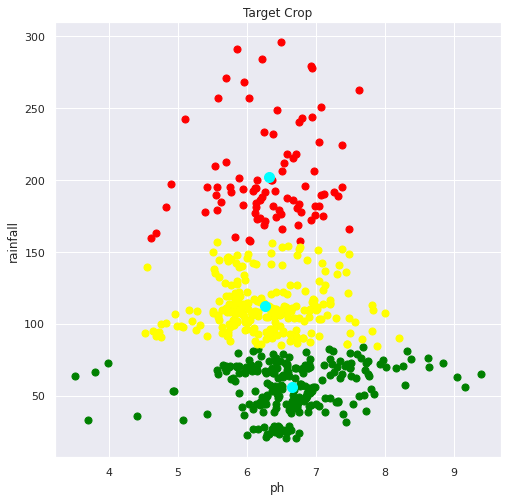

In [49]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red',label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='yellow',label='Cluster 3')




plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='Centroids')


plt.title('Target Crop')
plt.xlabel('ph')
plt.ylabel('rainfall')
plt.show()
